## Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating functions for algorithm

In [2]:
# hypothesis function
def h(X, theta1, theta0 = 0):
    return theta0 + np.dot(X,theta1)

In [3]:
# Cost function calculation
def cost(X, y, theta):
    m = len(X)
    preds = h(X, theta)
    costfn = (1/(2*m))*(np.sum((preds - y)**2))
    return costfn

In [4]:
# Finding gradient
def gradient(X, y, theta):
    m = len(X)
    preds = h(X, theta)
    gr = (1/m)*(np.matmul(X.T, (preds - y)))
    return gr

In [5]:
# Implementing gradient descent algorithm
def GradientDescent(X, y, theta, lr, converge, max_iter = 10000):
    costfn_list = []
    for i in range(max_iter):
        gr = gradient(X, y, theta)
        theta = theta - (gr*lr)
        costfn = cost(X, y, theta)
        costfn_list.append(costfn)

        if len(costfn_list)>1:
            if abs(costfn_list[-1]-costfn_list[-2])<converge:
                break
    return theta, costfn_list


## Using example data to check the algorithm (single feature)

### Loading and cleaning data

In [7]:
data = pd.read_csv('/content/test.csv')

In [10]:
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [11]:
data['x'].drop([213], inplace=True)
data['y'].drop([213], inplace=True)

In [12]:
X = data['x'].to_numpy()
X = np.vstack((np.ones(X.shape[0]), X)).T
y = data['y'].to_numpy()

### Fitting data into algorithm

In [13]:
thetax, costfnl = GradientDescent(X, y, theta=np.zeros(2), lr=0.00005, converge=0.000001, max_iter = 10000) # with tuned hyperparameters

In [14]:
print(thetax)
print(costfnl)

[0.01474202 1.00718448]
[1193.978950413063, 823.4634060875555, 568.3718222431813, 392.74702817465277, 271.83332399556514, 188.58696947705744, 131.27373442883714, 91.8148663992783, 64.64832679562839, 45.94477767338277, 33.067806348830985, 24.20230223639362, 18.098602694770918, 13.89634322084808, 11.003182286794827, 9.011306129581564, 7.63994418442017, 6.695792259059275, 6.045764783185798, 5.598235347567319, 5.290121238960973, 5.077991434112469, 4.931944654463058, 4.831394545088235, 4.7621678655947886, 4.714506660094916, 4.681692796357273, 4.659100992079211, 4.643546844863992, 4.6328379655857335, 4.625464943849517, 4.620388584690646, 4.616893425847624, 4.61448688771315, 4.612829840353216, 4.6116888004679915, 4.6109030200791015, 4.610361827834151, 4.609989029006691, 4.609732165248529, 4.609555120171778, 4.60943302845912, 4.6093487709012, 4.60929056130904, 4.609250285157734, 4.609222355780166, 4.6092029268822055, 4.6091893503772186, 4.609179803117371, 4.609173029906553, 4.609168166570599, 

In [15]:
print(len(costfnl))

58


### Visualisations

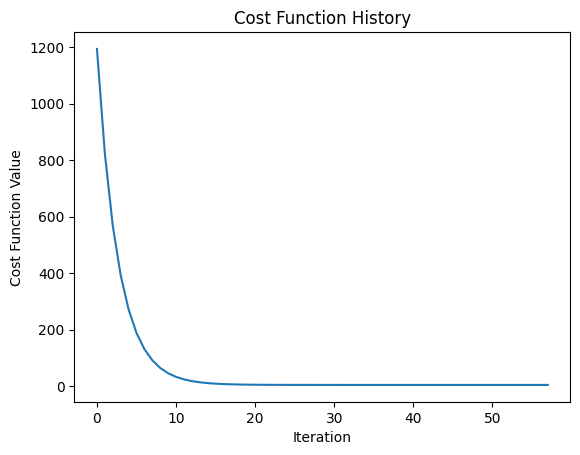

In [18]:
# plotting cost function over no. of iterations
plt.plot(costfnl)
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function History')
plt.show()
# cost function decreased with iterations and stopped at 58th iteration - minimum value achieved

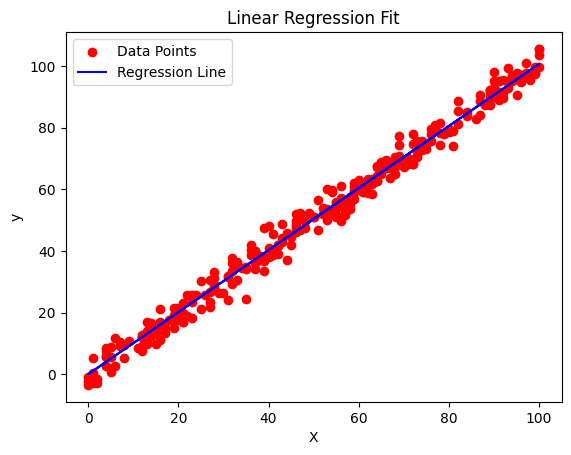

In [19]:
# make predictions
predictions = h(X, thetax)

# plotting actual data points
plt.scatter(X[:, 1], y, color='red', label='Data Points')

# plotting regression best fit line
plt.plot(X[:, 1], predictions, color='blue', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()